# Time Filtering Demos

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc

from Ska.engarchive import fetch_eng as fetch
from Chandra.Time import DateTime

# This is added to allow plots to show up in the notebook
%matplotlib inline

# Set defaults for dark background (ocean16)
rc('axes',edgecolor='w')
rc('text',color='w')
rc('lines',color=[1, 0 ,0])
rc('axes',labelcolor='w')
rc('xtick',color='w')
rc('ytick',color='w')


/Users/wolf809/Anaconda/anaconda/envs/skamatt3/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/Users/wolf809/Anaconda/anaconda/envs/skamatt3/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
tstart = '2015:018:00:00:00'
tstop = '2015:040:00:00:00'

I don't think you want to interpolate here (`eb1k5.interpolate()`). If you do it will automatically use a time sampling period of 32.8 seconds. This is useful when you have multiple MSIDs in the fetch object (via `fetch.MSIDSet`), but for a single MSID it is often best to stick to the original timeseries data.

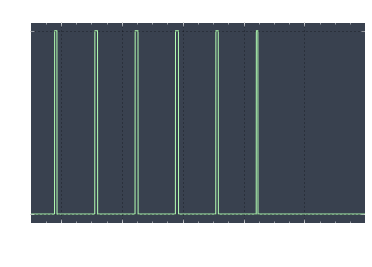

In [3]:
eb1k5 = fetch.Msid('eb1k5', tstart, tstop)
# eb1k5.interpolate()
eb1k5.iplot()
ax = plt.gca()
c = ax.get_children()
for child in c:
    try:
        if 'line' in unicode(child).lower():
            child.set_color([0.7, 1, 0.7])
        else:
            child.set_color('w')
    except AttributeError:
        pass
ax.set_axis_bgcolor('#39414F')


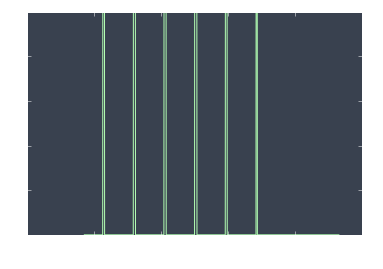

In [4]:
ax = plt.gca()
ax.plot(eb1k5.times, eb1k5.raw_vals, color=[0.7, 1, 0.7])
ax.set_axis_bgcolor('#39414F')

Here I use the `logical_intervals()` function built into the fetch object to eliminate the need for an extra library import. Because the object returned from this function is an Astropy Table, we can take advantage of the named column access to make the code a bit more readable to pull out the start and stop times for each K5=ON duration.

In [5]:
eclipse_times = eb1k5.logical_intervals('==', 'ON ')
eclipse_times = zip(eclipse_times['datestart'], eclipse_times['datestop'])
eclipse_times

[('2015:019:14:07:59.020', '2015:019:17:50:45.021'),
 ('2015:022:05:32:47.033', '2015:022:09:56:16.634'),
 ('2015:024:21:03:52.246', '2015:025:01:39:07.047'),
 ('2015:027:12:40:09.058', '2015:027:17:26:03.459'),
 ('2015:030:04:20:48.271', '2015:030:08:12:35.472'),
 ('2015:032:20:05:17.084', '2015:032:22:42:10.685')]

Next round each starting time to the start of the day, and the ending time to the end of the day.

In [6]:
eclipse_times_rounded = []
for interval in eclipse_times:
    t1secs = DateTime('{}:00:00:00.000'.format(interval[0][:8])).secs -1
    t2secs = DateTime('{}:00:00:00.000'.format(interval[1][:8])).secs + 24*3600
    eclipse_times_rounded.append((DateTime(t1secs).date, DateTime(t2secs).date))

In [7]:
eclipse_times_rounded

[('2015:018:23:59:59.000', '2015:020:00:00:00.000'),
 ('2015:021:23:59:59.000', '2015:023:00:00:00.000'),
 ('2015:023:23:59:59.000', '2015:026:00:00:00.000'),
 ('2015:026:23:59:59.000', '2015:028:00:00:00.000'),
 ('2015:029:23:59:59.000', '2015:031:00:00:00.000'),
 ('2015:031:23:59:59.000', '2015:033:00:00:00.000')]

Fetch EPOWER1 and plot.

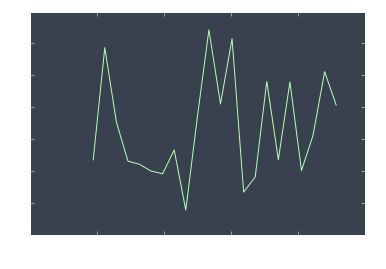

In [8]:
epower1 = fetch.Msid('EPOWER1', tstart, tstop, stat='daily')
plt.plot(epower1.times, epower1.vals, color=[0.7, 1, 0.7])
ax = plt.gca()
ax.set_axis_bgcolor('#39414F')


Now use those times to filter out whole days from EPOWER1.

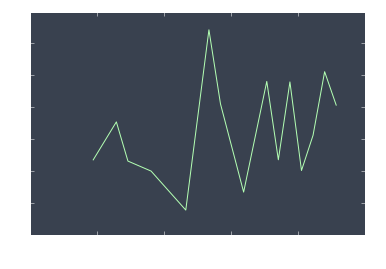

In [9]:
epower1.remove_intervals(eclipse_times_rounded)
plt.plot(epower1.times, epower1.vals, color=[0.7, 1, 0.7])
ax = plt.gca()
ax.set_axis_bgcolor('#39414F')
